# UTILIZING MULTIPLE REGRESSION ANALYSIS TO PREDICT HOUSE PRICES IN KING COUNTY

![king_county](king_county.jpg)

# Business Understanding

Some homeowners are eager to sell, but certain houses are undervalued due to wear and tear. Housing prices can fluctuate based on market trends and buyer preferences. Homeowners aim to increase their property value for higher selling prices, but they lack knowledge and insights on effective strategies to do so.

Our analysis and modelling aimed to help homeowners make informed decisions by assessing how factors like home condition, size, renovations and more can impact their home's estimated value.

# Business Questions
1. Does the year the house was built and/or renovated affect the sale        price of a house? 

2. Do qualitative features of a house (grade, condition e.tc) affect its sale price? 

3. Do quantitative features of a house (bedrooms, sqft of spaces) affect it’s sale price ?

# Data Understanding
The dataset provided (``kc_house_data.csv``) has information on the features of single-family house sales between 2014 and 2015. More information on this features is found in this link [Residential Glossary of Terms](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#g). The file ``column_names.md`` contains column descriptions.

- The analysis was based on King County data set.

- It had a total of 21,597 records, containing 20 columns and 21,597 rows. 

- Timeframe of the data is 2014 to 2015. 

- Each row contains data of an  individual house, which is indexed by a unique house id. 

- The data has numerical and categorical variables.

# Data Preparation, Processing, EDA

### Libraries

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


import warnings

### Import the Data

In [48]:
# import and view the first five records
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The data has 21 columns and 21597 rows. The descriptions are in the Residential Glossary of Terms (linked above in the [Important links](#Important-links) section).

In [50]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [51]:
data.sample(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
11496,2025079037,10/1/2014,510000.0,3,2.25,2750,219542,2.0,NO,NONE,...,7 Average,1870,880.0,1981,0.0,98014,47.6367,-121.948,2430,219542
19274,3416600490,7/31/2014,675000.0,3,2.25,1780,4252,2.0,NO,NONE,...,8 Good,1540,240.0,1989,0.0,98144,47.6004,-122.292,2220,4000
19390,9202650040,9/26/2014,401000.0,3,1.00,1120,8321,1.0,NO,NONE,...,6 Low Average,1120,0.0,1941,NaN,98027,47.5631,-122.091,1980,8671
498,9274202270,8/18/2014,625000.0,2,1.50,1490,5750,1.5,NO,NONE,...,7 Average,1190,300.0,1900,0.0,98116,47.5872,-122.390,1590,4025
4869,3832710680,7/21/2014,215000.0,4,2.00,1540,7575,1.0,NaN,NONE,...,7 Average,1040,500.0,1978,NaN,98032,47.3664,-122.279,1720,7575
18472,1238500978,9/22/2014,365000.0,3,1.00,950,8450,1.0,NO,NONE,...,7 Average,950,0.0,1962,0.0,98033,47.6884,-122.186,1610,10080
1746,9424400200,5/15/2014,451555.0,2,1.00,1320,4520,1.0,NO,FAIR,...,6 Low Average,1320,0.0,1912,1971.0,98116,47.5655,-122.394,1420,4560
8364,2044500201,6/9/2014,435000.0,3,2.25,1890,7200,1.0,NO,NONE,...,7 Average,1230,660.0,1973,0.0,98125,47.7156,-122.317,1970,8101
1116,255520260,3/24/2015,624000.0,5,3.75,3570,14648,2.0,NO,NONE,...,9 Better,3570,0.0,2005,0.0,98019,47.7377,-121.974,3160,7882
12966,7967950040,4/16/2015,485000.0,4,2.50,3710,15935,1.0,NO,NONE,...,10 Very Good,2130,1580.0,2005,NaN,98001,47.3528,-122.267,3674,17913


### Create a Copy of the dataFrame

In [52]:
data_copy = data.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Processing the Data

There are a few issues with the data.
1. Missing values in the ``yr_renovated`` column.
2. The ``sqft_basement`` feature has string values instead of numeral values.

### Correcting Data Types

There is a problem with the ``sqft_basement`` feature. There are values denoted as "?" that need to be replaced with 0.

In [53]:
data_copy["sqft_basement"] = data_copy.sqft_basement.replace("?", 0.0)
data_copy.sqft_basement.value_counts()

0.0       12826
0.0         454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [54]:
# check that the data correction was successful

data_copy['sqft_basement']= data_copy.sqft_basement.astype('float64')
data_copy["sqft_basement"].sample(12)

6657       0.0
7311       0.0
2332     790.0
10943      0.0
11150      0.0
3000     980.0
11605    600.0
8366     460.0
15644      0.0
2345       0.0
4799     610.0
10846      0.0
Name: sqft_basement, dtype: float64

### Encoding Categorical Variables 

**1. ``view``**

The ``view`` feature had only 63 missing values. All were replaced with 0 (houses with no views) while the rest of the elements were graded with numbers.

In [55]:
data_copy["view"].replace("FAIR", 1, inplace = True)
data_copy["view"].replace("AVERAGE", 2, inplace = True)
data_copy["view"].replace("GOOD", 3, inplace = True)
data_copy["view"].replace("EXCELLENT", 4, inplace = True)
data_copy["view"].replace("NONE", 0, inplace = True)
data_copy["view"].fillna(value = 0, inplace = True)

In [56]:
data_copy["view"].head(22)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    3.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    4.0
Name: view, dtype: float64

**2. `grade``**

In [57]:
grading = data_copy["grade"].unique()
grading.sort()
grading

array(['10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion',
       '3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average',
       '8 Good', '9 Better'], dtype=object)

In [58]:
data_copy["grade_levels"] = data_copy['grade'].str.extract('(\d+)').astype('int64')
print(data_copy.head(10))

           id        date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014   221900.0         3       1.00         1180   
1  6414100192   12/9/2014   538000.0         3       2.25         2570   
2  5631500400   2/25/2015   180000.0         2       1.00          770   
3  2487200875   12/9/2014   604000.0         4       3.00         1960   
4  1954400510   2/18/2015   510000.0         3       2.00         1680   
5  7237550310   5/12/2014  1230000.0         4       4.50         5420   
6  1321400060   6/27/2014   257500.0         3       2.25         1715   
7  2008000270   1/15/2015   291850.0         3       1.50         1060   
8  2414600126   4/15/2015   229500.0         3       1.00         1780   
9  3793500160   3/12/2015   323000.0         3       2.50         1890   

   sqft_lot  floors waterfront  view  ... sqft_above sqft_basement  yr_built  \
0      5650     1.0        NaN   0.0  ...       1180           0.0      1955   
1      7242     2.0      

**3. ``condition``**

In [59]:
data_copy["condition"].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [60]:
condition_mapping = {
    'Average': 0,
    'Very Good': 1,
    'Good': 2,
    'Poor': 3,
    'Fair': 4
}

# Assuming you have a pandas DataFrame named 'kc_data'
data_copy['condition_numeric'] = data_copy['condition'].map(condition_mapping)

**4. ``waterfront``**

The ``waterfront`` feature also has NaN values. Since the feature is a string, the elements were replaced with numerical values and the missing values replaced with 0 to denote that the house has no waterfront.

In [61]:
# There was YES, NO or NaN

data_copy['waterfront'].replace("YES", 1, inplace = True)
data_copy['waterfront'].replace("NO", 0, inplace = True)
data_copy['waterfront'].fillna(value = 0, inplace = True)

### Missing Values

The ``yr_renovated`` missing values can be replaced with zero to indicate that renovation has not been done.

In [62]:
data_copy.yr_renovated.fillna(0.0, inplace=True)

In [63]:
data_copy.waterfront.isna().sum()

0

In [64]:
data_copy.isna().sum()

id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated         0
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
grade_levels         0
condition_numeric    0
dtype: int64

### Outliers

- The bedroom feature had some houses with 11 and 33 bedrooms. This may affect the quality of the graph. Hence, the rows will be dropped.

In [65]:
data_copy = data_copy[data_copy["bedrooms"] <= 10]
data_copy.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
Name: bedrooms, dtype: int64

### Dropping Some Columns

In [66]:
data_copy.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'grade_levels',
       'condition_numeric'],
      dtype='object')

We decided to keep specific columns as predictor variables of the price variable. Hence, we dropped the other columns early on in the analysis by creating a dataframe with the selected columns.
Our columns of choice were:
``price``, ``sqft_living``, ``sqft_lot``, ``sqft_basement``, ``sqft_above``,
``yr_built``, ``bedrooms``, ``bathrooms``, ``yr_renovated``, ``grade``, ``condition``, ``waterfront``, ``view``, ``floors``.

Henceforth, ``id``, ``date``, ``zipcode``, ``lat``, ``long``, ``sqft_living15``, ``sqft_lot15`` were dropped as they were not relevant to our modelling.

In [67]:
kc_data = data_copy[["price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "sqft_basement", "sqft_above", "yr_built", "yr_renovated", "grade", "condition", "waterfront", "view", "floors","grade_levels", "condition_numeric"]]
print(kc_data.dtypes)

price                float64
bedrooms               int64
bathrooms            float64
sqft_living            int64
sqft_lot               int64
sqft_basement        float64
sqft_above             int64
yr_built               int64
yr_renovated         float64
grade                 object
condition             object
waterfront           float64
view                 float64
floors               float64
grade_levels           int64
condition_numeric      int64
dtype: object


In [68]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21595 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              21595 non-null  float64
 1   bedrooms           21595 non-null  int64  
 2   bathrooms          21595 non-null  float64
 3   sqft_living        21595 non-null  int64  
 4   sqft_lot           21595 non-null  int64  
 5   sqft_basement      21595 non-null  float64
 6   sqft_above         21595 non-null  int64  
 7   yr_built           21595 non-null  int64  
 8   yr_renovated       21595 non-null  float64
 9   grade              21595 non-null  object 
 10  condition          21595 non-null  object 
 11  waterfront         21595 non-null  float64
 12  view               21595 non-null  float64
 13  floors             21595 non-null  float64
 14  grade_levels       21595 non-null  int64  
 15  condition_numeric  21595 non-null  int64  
dtypes: float64(7), int64(7

In [69]:
kc_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_basement,sqft_above,yr_built,yr_renovated,grade,condition,waterfront,view,floors,grade_levels,condition_numeric
0,221900.0,3,1.00,1180,5650,0.0,1180,1955,0.0,7 Average,Average,0.0,0.0,1.0,7,0
1,538000.0,3,2.25,2570,7242,400.0,2170,1951,1991.0,7 Average,Average,0.0,0.0,2.0,7,0
2,180000.0,2,1.00,770,10000,0.0,770,1933,0.0,6 Low Average,Average,0.0,0.0,1.0,6,0
3,604000.0,4,3.00,1960,5000,910.0,1050,1965,0.0,7 Average,Very Good,0.0,0.0,1.0,7,1
4,510000.0,3,2.00,1680,8080,0.0,1680,1987,0.0,8 Good,Average,0.0,0.0,1.0,8,0


In [70]:
kc_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_basement,sqft_above,yr_built,yr_renovated,waterfront,view,floors,grade_levels,condition_numeric
count,2.159500e+04,21595.000000,21595.000000,21595.000000,2.159500e+04,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000
mean,5.402929e+05,3.371475,2.115802,2080.300579,1.510030e+04,285.688400,1788.603195,1971.003241,68.672007,0.006761,0.233202,1.494096,7.657976,0.640009
std,3.673845e+05,0.902643,0.768992,918.121966,4.141445e+04,439.830437,827.771962,29.373926,363.816998,0.081948,0.764705,0.539686,1.173237,0.926677
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,0.000000,370.000000,1900.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,0.000000,1190.000000,1951.000000,0.000000,0.000000,0.000000,1.000000,7.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,0.000000,1560.000000,1975.000000,0.000000,0.000000,0.000000,1.500000,7.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068600e+04,550.000000,2210.000000,1997.000000,0.000000,0.000000,0.000000,2.000000,8.000000,2.000000
max,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,4820.000000,9410.000000,2015.000000,2015.000000,1.000000,4.000000,3.500000,13.000000,4.000000


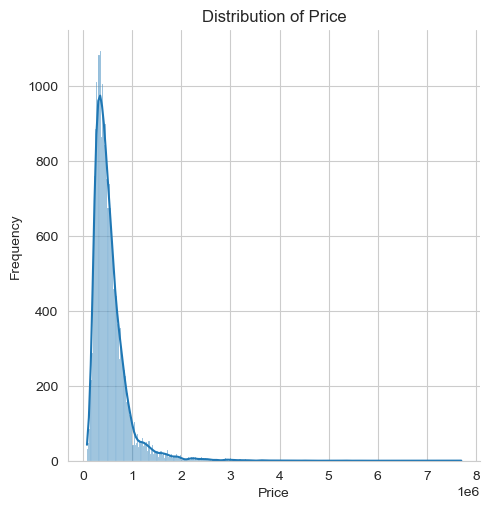

In [71]:
#Set plot style
sns.set_style("whitegrid")

# Create distribution plot
sns.displot(kc_data['price'], kde=True)

# Set plot title and labels
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")

# Show plot
plt.show()

### Visualizing the Categorical Variables - Grade, Waterfront

**Observations**

Most houses sold were of average grade and condition.

Most did not have a waterfront.

Majority sold had no view.

### Visualizing the Continuous Variables vs ``price`` - ``sqft_living``,	``sqft_lot``,	``sqft_basement``

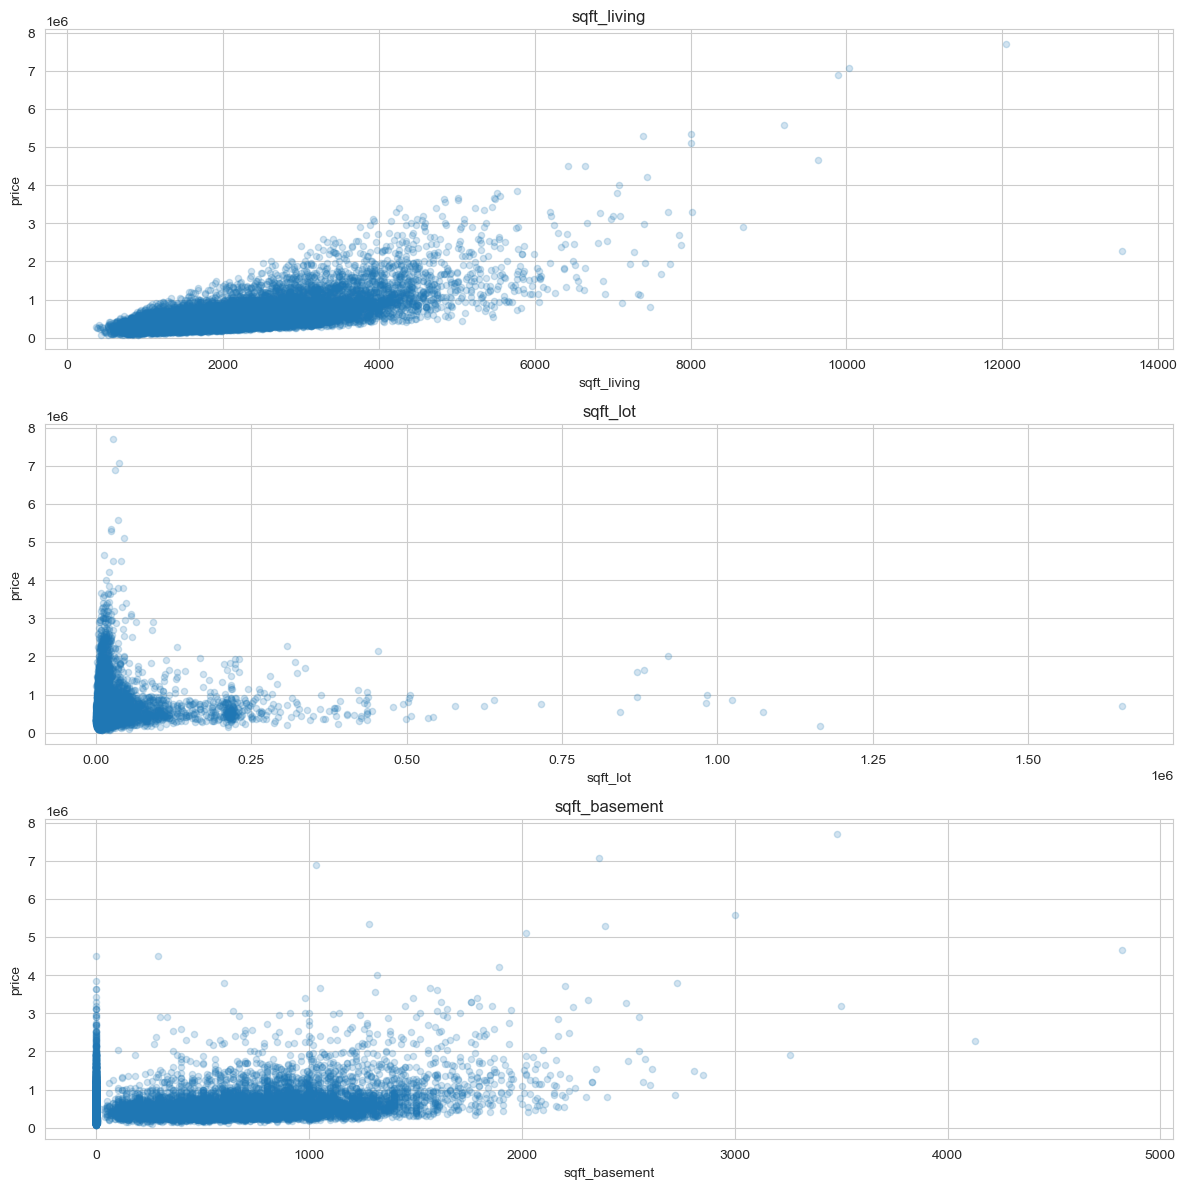

In [72]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12,12))

for xcol, ax in zip(["sqft_living", "sqft_lot", "sqft_basement"], axes):
    kc_data.plot(kind = "scatter", x = xcol, y = "price", ax = ax, alpha=0.2)
    
    ax.set_title(xcol)               
    
fig.tight_layout()

**Observation**

``sqft_living`` and ``sqft_basement`` have a linear relationship with the ``price``. 

### Checking for Collinearity

In [73]:
correlation = kc_data.corr()['price'].map(abs).sort_values(ascending = False)
correlation

price                1.000000
sqft_living          0.701948
grade_levels         0.667967
sqft_above           0.605401
bathrooms            0.525934
view                 0.393502
sqft_basement        0.321109
bedrooms             0.316504
waterfront           0.264308
floors               0.256828
yr_renovated         0.117948
sqft_lot             0.089879
yr_built             0.053964
condition_numeric    0.034484
Name: price, dtype: float64

The strongest correlation with price is with ``sqft_living``, ``bathrooms`` and ``sqft_basement``. The heatmap below visualizes this information.

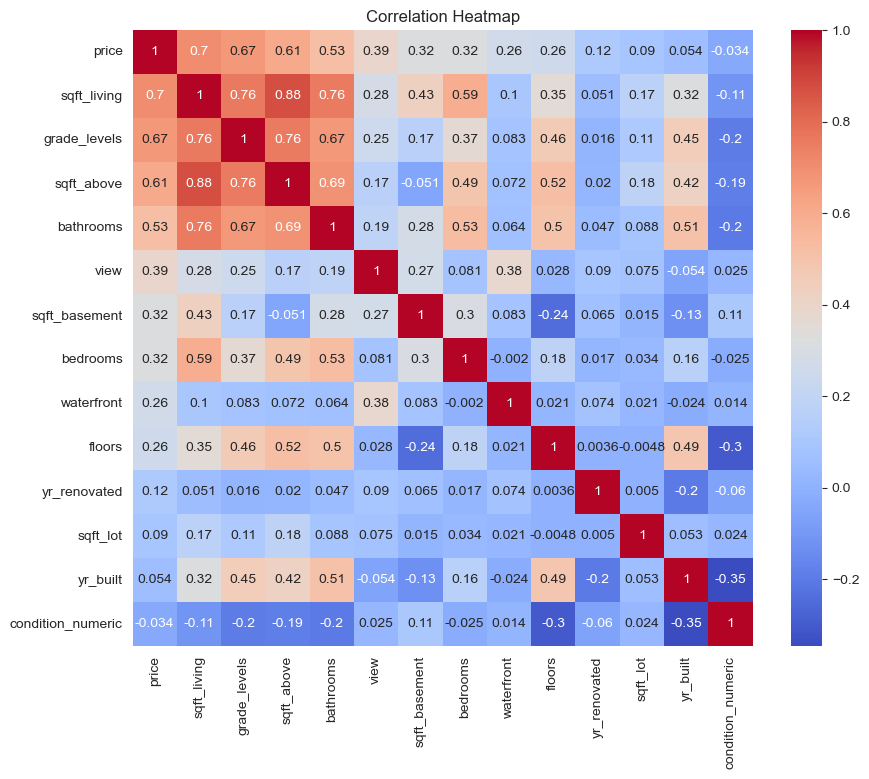

In [74]:
correlation_matrix = kc_data[correlation.index].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Feature Engineering

- Adding some columns to help extract more information.

In [75]:
kc_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_basement', 'sqft_above', 'yr_built', 'yr_renovated', 'grade',
       'condition', 'waterfront', 'view', 'floors', 'grade_levels',
       'condition_numeric'],
      dtype='object')

In [76]:
kc_data.loc[:, "house_age"] = 2015 - kc_data["yr_built"].values
kc_data.loc[:, "renovation_status"] = kc_data["yr_renovated"].values - kc_data["yr_built"].values
kc_data.loc[:, "renovation_status"] = np.where(kc_data["renovation_status"].isnull(), 0, kc_data["renovation_status"])

C:\Users\hp\AppData\Local\Temp\ipykernel_9412\3523992008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kc_data.loc[:, "house_age"] = 2015 - kc_data["yr_built"].values
C:\Users\hp\AppData\Local\Temp\ipykernel_9412\3523992008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kc_data.loc[:, "renovation_status"] = kc_data["yr_renovated"].values - kc_data["yr_built"].values
C:\Users\hp\AppData\Local\Temp\ipykernel_9412\3523992008.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [77]:
print(data_copy.head(5))
print(data_copy.columns)

           id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ... sqft_basement yr_built  \
0      5650     1.0         0.0   0.0  ...           0.0     1955   
1      7242     2.0         0.0   0.0  ...         400.0     1951   
2     10000     1.0         0.0   0.0  ...           0.0     1933   
3      5000     1.0         0.0   0.0  ...         910.0     1965   
4      8080     1.0         0.0   0.0  ...           0.0     1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0           0.0    98178  47.5112 -122.257           1340        5650   


### Multicollinearity

In [78]:
abs(kc_data.corr()) > .75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_basement,sqft_above,yr_built,yr_renovated,waterfront,view,floors,grade_levels,condition_numeric,house_age,renovation_status
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,True,False,False,False,False,False,True,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False
yr_built,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
yr_renovated,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
waterfront,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [79]:
data = pd.read_csv("kc_house_data.csv")
data_copy = data.copy()
# kc_data = data_copy[["price", "bedrooms", "bathrooms","sqft_living", "sqft_lot", "sqft_basement", "sqft_above", "yr_built", "yr_renovated", "grade", 
#                      "condition", "waterfront", "view", "floors", "renovation_status", "house_age"]]

In [80]:
# Creating a new dataframe of the absolute values of the correlations
collinear_pairs = kc_data.corr().abs().stack().reset_index().sort_values(0, ascending=False)
collinear_pairs['pairs'] = list(zip(collinear_pairs.level_0, collinear_pairs.level_1))
collinear_pairs.set_index(['pairs'], inplace = True)
collinear_pairs.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
collinear_pairs.columns = ['cc']
collinear_pairs.drop_duplicates(inplace=True)

# Filter for correlation coefficients less than 1 and greater than 0.76
collinear_pairs[(collinear_pairs.cc>.76) & (collinear_pairs.cc<1)]

,cc
pairs,
"(house_age, yr_built)",1.000000
"(yr_renovated, renovation_status)",0.996987
"(sqft_living, sqft_above)",0.876446
"(sqft_living, grade_levels)",0.762825


- To ensure that data interpretation accuracy is addressed, ``sqft_living`` will be dropped when modelling because it is strongly correlated with two other predictor variables.
- Further, ``renovation_status`` and ``house_age``were dropped since they were a result of feature engineering yet they caused a near perfect collinearity.

In [81]:
kc_data = kc_data.drop(columns=["sqft_living", "renovation_status", "house_age"])

In [82]:
print(kc_data.columns)

print(kc_data.info())

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'sqft_basement',
       'sqft_above', 'yr_built', 'yr_renovated', 'grade', 'condition',
       'waterfront', 'view', 'floors', 'grade_levels', 'condition_numeric'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21595 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              21595 non-null  float64
 1   bedrooms           21595 non-null  int64  
 2   bathrooms          21595 non-null  float64
 3   sqft_lot           21595 non-null  int64  
 4   sqft_basement      21595 non-null  float64
 5   sqft_above         21595 non-null  int64  
 6   yr_built           21595 non-null  int64  
 7   yr_renovated       21595 non-null  float64
 8   grade              21595 non-null  object 
 9   condition          21595 non-null  object 
 10  waterfront         21595 non-null  float64
 11  view               215

## Creating the Models

### 1. Base Model
- The base model takes into consideration the feature with the strongest correlation with price after ``sqft_living`` which has auto-correlation with other variables.
- From our analysis, the feature is ``grade``. For the purpose of modelling, the column ``grade_levels`` was used.

In [83]:
# Create our X and y for the baseline model
y = kc_data["price"]
X = kc_data["grade_levels"]
# Add a constant column to the feature matrix for the intercept term
X = sm.add_constant(X)

# Create and fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.740e+04
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:19:37   Log-Likelihood:            -3.0098e+05
No. Observations:               21595   AIC:                         6.020e+05
Df Residuals:                   21593   BIC:                         6.020e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.061e+06   1.23e+04    -86.398   

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Grade and price are positively correlated.


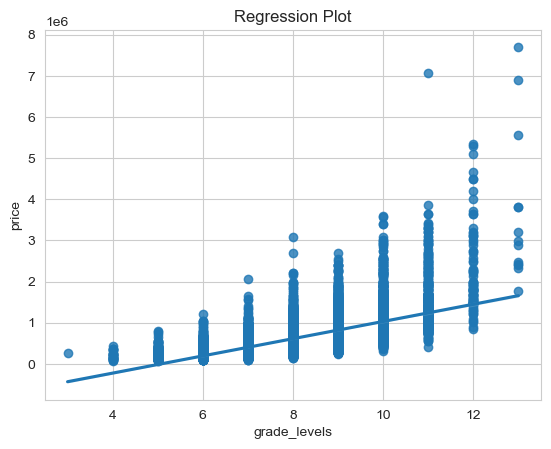

In [84]:
sns.regplot(kc_data['grade_levels'], kc_data['price'])
plt.title("Regression Plot")
print("Grade and price are positively correlated.")

### 2. Iterating Categorical and Numerical Features

In the cell below, we added one categorical variable after another but the r-squared values were blow 60%, with grade giving us the highest r-squared of 55%.

In [85]:
num_cat_features = kc_data[["bedrooms", "bathrooms", "sqft_lot", "sqft_basement", "sqft_above", "floors", "condition_numeric"]]

y = kc_data["price"]
X = num_cat_features

# Add a constant column to the feature matrix for the intercept term
X = sm.add_constant(X)

# Create and fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     3223.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:19:38   Log-Likelihood:            -2.9964e+05
No. Observations:               21595   AIC:                         5.993e+05
Df Residuals:                   21587   BIC:                         5.994e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5.504e+04   8303.36

In [86]:
num_cat_features = kc_data[["bedrooms", "bathrooms", "sqft_lot", "sqft_basement", "sqft_above", "floors", "view"]]

y = kc_data["price"]
X = num_cat_features

# Add a constant column to the feature matrix for the intercept term
X = sm.add_constant(X)

# Create and fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     3696.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:19:38   Log-Likelihood:            -2.9886e+05
No. Observations:               21595   AIC:                         5.977e+05
Df Residuals:                   21587   BIC:                         5.978e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.144e+04   7616.689     10.693

In [87]:
num_cat_features = kc_data[["bedrooms", "bathrooms", "sqft_lot", "sqft_basement", "sqft_above", "floors", "grade_levels"]]

y = kc_data["price"]
X = num_cat_features

# Add a constant column to the feature matrix for the intercept term
X = sm.add_constant(X)

# Create and fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     3775.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:19:38   Log-Likelihood:            -2.9873e+05
No. Observations:               21595   AIC:                         5.975e+05
Df Residuals:                   21587   BIC:                         5.975e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.173e+05   1.53e+04    -33.733

### 3. Model Using All Features

In [88]:
features = kc_data.columns.drop(["price", "grade","condition", "view"])

# Create the feature matrix X and the target vector y
X = kc_data[features]
y = kc_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Add a constant column to the feature matrix for the intercept term
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Create and fit the linear regression model
model = sm.OLS(y_train, X_train)
results = model.fit()

# Print the summary of the model
print(results.summary())

# Print the coefficients and intercept
print("Coefficients:")
print(results.params.drop('const'))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     2876.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:19:38   Log-Likelihood:            -2.3695e+05
No. Observations:               17276   AIC:                         4.739e+05
Df Residuals:                   17264   BIC:                         4.740e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              6.837e+06   1.48e+0

### 4. Time period: ``yr_built`` and ``yr_renovated``

In [89]:
y = kc_data["price"]
X = kc_data[["yr_built", "yr_renovated"]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Add a constant column to the feature matrix for the intercept term
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Create and fit the linear regression model
model = sm.OLS(y_train, X_train)
results = model.fit()

# Add a constant column to the feature matrix for the intercept term
X_train = sm.add_constant(X)
X_test = sm.add_constant(X_test)

# Create and fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.689
Model:                            OLS   Adj. R-squared (uncentered):              0.689
Method:                 Least Squares   F-statistic:                          2.394e+04
Date:                Fri, 02 Jun 2023   Prob (F-statistic):                        0.00
Time:                        22:19:38   Log-Likelihood:                     -3.0718e+05
No. Observations:               21595   AIC:                                  6.144e+05
Df Residuals:                   21593   BIC:                                  6.144e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

### 5. Qualitative Features: ``grade``, ``waterfront``, ``condition``, ``view``

In [90]:
y = kc_data["price"]
X = kc_data[["grade_levels","waterfront","condition_numeric", "view"]]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()

model.fit(X, y)

# Add a constant column to the feature matrix for the intercept term
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Create and fit the linear regression model
model = sm.OLS(y_train, X_train)
results = model.fit()

# Add a constant column to the feature matrix for the intercept term
X_train = sm.add_constant(X)
X_test = sm.add_constant(X_test)

# Create and fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.802
Model:                            OLS   Adj. R-squared (uncentered):              0.802
Method:                 Least Squares   F-statistic:                          2.187e+04
Date:                Fri, 02 Jun 2023   Prob (F-statistic):                        0.00
Time:                        22:19:39   Log-Likelihood:                     -3.0231e+05
No. Observations:               21595   AIC:                                  6.046e+05
Df Residuals:                   21591   BIC:                                  6.047e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

### 6. Quantitative Features: ``bedrooms``, ``bathrooms``, ``sqft_living``, ``sqft_lot``, ``sqft_basement``, ``sqft_above``, ``floors``

In [91]:
y = kc_data["price"]
X = kc_data[["bedrooms", "bathrooms", "sqft_lot", "sqft_basement", "sqft_above", "floors"]]

# Split the data into training and testing sets
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()

model.fit(X, y)

# Add a constant column to the feature matrix for the intercept term
X_train_num = sm.add_constant(X_train_num)
X_test_num = sm.add_constant(X_test_num)

# Create and fit the linear regression model
model = sm.OLS(y_train_num, X_train_num)
results = model.fit()

# predict on train and test data
target_train_pred = results.predict(X_train_num)
target_test_pred = results.predict(X_test_num)

# Add a constant column to the feature matrix for the intercept term
X_train_num = sm.add_constant(X)
X_test_num = sm.add_constant(X_test_num)

# Create and fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.843
Model:                            OLS   Adj. R-squared (uncentered):              0.843
Method:                 Least Squares   F-statistic:                          1.939e+04
Date:                Fri, 02 Jun 2023   Prob (F-statistic):                        0.00
Time:                        22:19:39   Log-Likelihood:                     -2.9977e+05
No. Observations:               21595   AIC:                                  5.996e+05
Df Residuals:                   21589   BIC:                                  5.996e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

## Regression Results

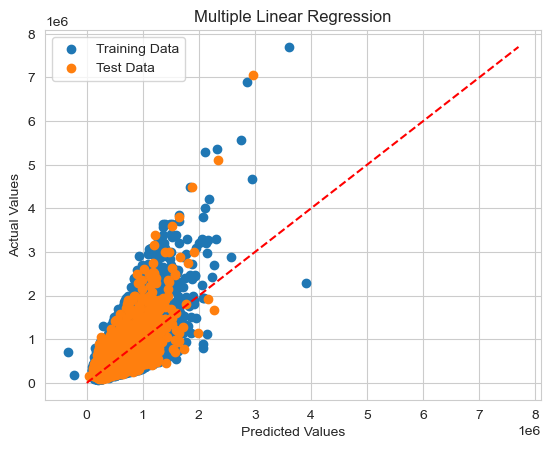

In [92]:
fig, ax = plt.subplots()
ax.scatter(target_train_pred, y_train_num, label='Training Data')
ax.scatter(target_test_pred, y_test_num, label='Test Data')
ax.plot([0, np.max(y)], [0, np.max(y)], linestyle='--', color='r')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Multiple Linear Regression')
ax.legend()
plt.show()


The model is a good fit since the training data and test data do not over fit or underfit.

**Observations**

The model that incorporated the numerical features, was the most favorable,  with an R squared of 0.84 . Approximately 84.3% of the variation in the dependent variable (price) can be explained by the numerical independent variables. 

Other statistics of the model are: 
- F-statistic 0f 2.188e+04 – indicating that the regression model is statistically significant
- p-values (below 0.05) – indicating statistical significance of the coefficients. 

**Co-efficiency**
- floors: Houses with an additional floor have a predicted price increase of approximately 27,060 (p < 0.001).
- bathrooms: For each additional bathroom, the predicted price increases by approximately 12,640 (p = 0.001). 
- sqft_basement: For each additional square foot of basement area, the predicted price increases by approximately $334.84 (p < 0.001).

## Conclusion
- In conclusion, home sellers should take in the following:
  - Consider increasing the space of the house, by increasing the number of floors, bathrooms & the size of basement & above ground area
  - Highly graded houses fetch higher prices. Waterfront and views, also increase the value of houses. 
  - The newer the  house, the higher the price, similarly, the most recently renovated houses fetch higher prices. Therefore, sellers need to renovated their houses.
   
- Models that incorporate other features such as proximity to amenities, the nature of geographical features and the locality's weather conditions have an impact on a property's sale value.
- Furthermore, it would be interesting to investigate whether certain months and seasons have an impact on the demand for homes.